# Telecommunication - Customer Churn Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [2]:
df= pd.read_csv("customers.csv",index_col = False)
pd.set_option("display.max_columns",None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [46]:
print("Number of rows:",df.shape[0],"\nNumber of columns:",df.shape[1])

Number of rows: 7043 
Number of columns: 21


In [47]:
df.describe(include='O').T

,count,unique,top,freq
customerid,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phoneservice,7043,2,Yes,6361
multiplelines,7043,3,No,3390
internetservice,7043,3,Fiber optic,3096
onlinesecurity,7043,3,No,3498
onlinebackup,7043,3,No,3088
deviceprotection,7043,3,No,3095


In [48]:
#dropping unwanted columns
df.drop(columns="customerid",axis= 1,inplace=True)

In [49]:
#checking for empty values in totalcharges
len(df[df['totalcharges']==' '])

11

In [50]:
#replcaing empty values in total charges
df['totalcharges'] = df['totalcharges'].replace(' ',0)   
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors= 'coerce')
df['totalcharges'] = df['totalcharges'].astype(str).astype(float)

In [51]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [52]:
print("Number of duplicates",df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicates 22


Exploratory Data Analysis

In [53]:
numeric = df.select_dtypes(include='number').columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()
print("Numerical columns : ",numeric)
print("categorical columns :",categorical)

Numerical columns :  ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
categorical columns : ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']


Univariate Analysis


In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def univ_cat(df, col):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'histogram'}, {'type':'pie'}]], subplot_titles=['Histogram', 'Pie'])
    fig.add_trace(go.Histogram(x=df[col]), 1, 1)
    fig.add_trace(go.Pie(labels=df[col].value_counts().index, values=df[col].value_counts(), textinfo='label+percent'), 1, 2)
    fig.update_layout( title_text=f'{col}')
    fig.update_traces(showlegend=False)
    fig.show()

In [55]:
for column in categorical:
    univ_cat(df,column)

In [56]:
#categorical churn to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(df['churn'])
df['churn'] = label

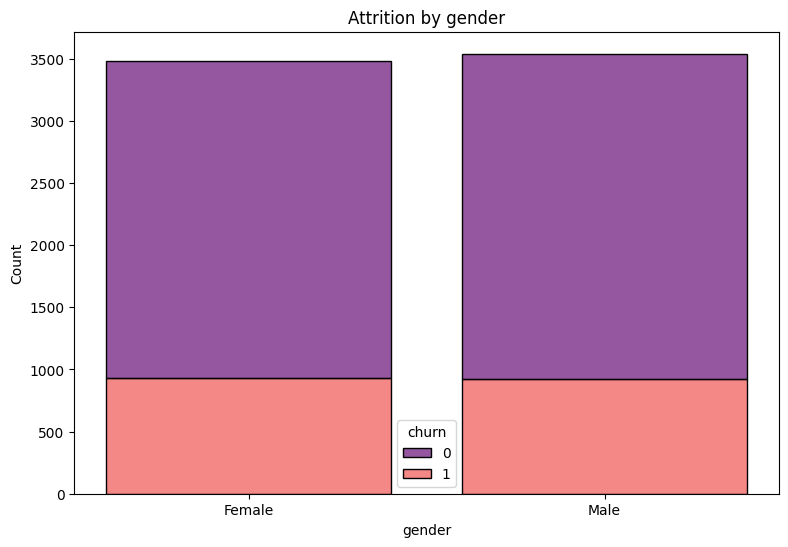

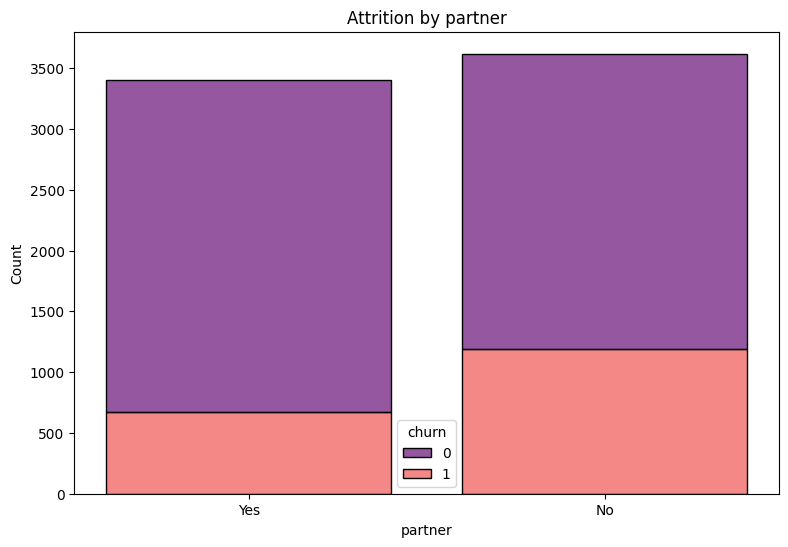

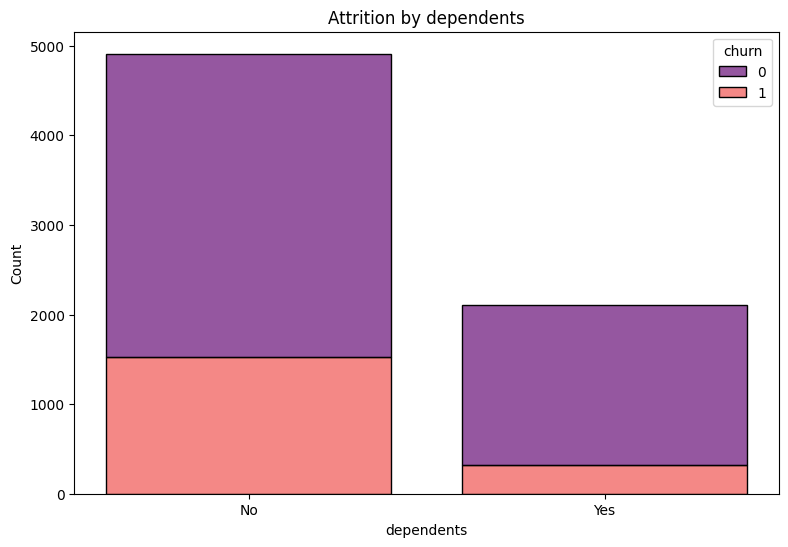

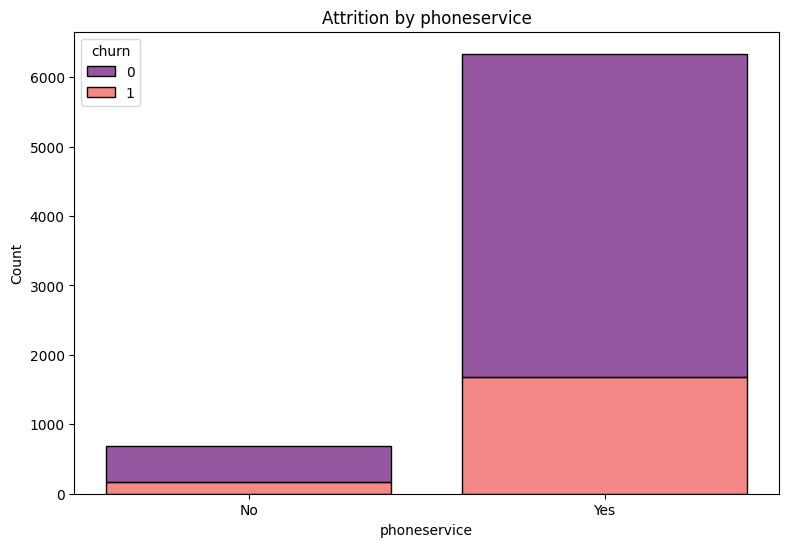

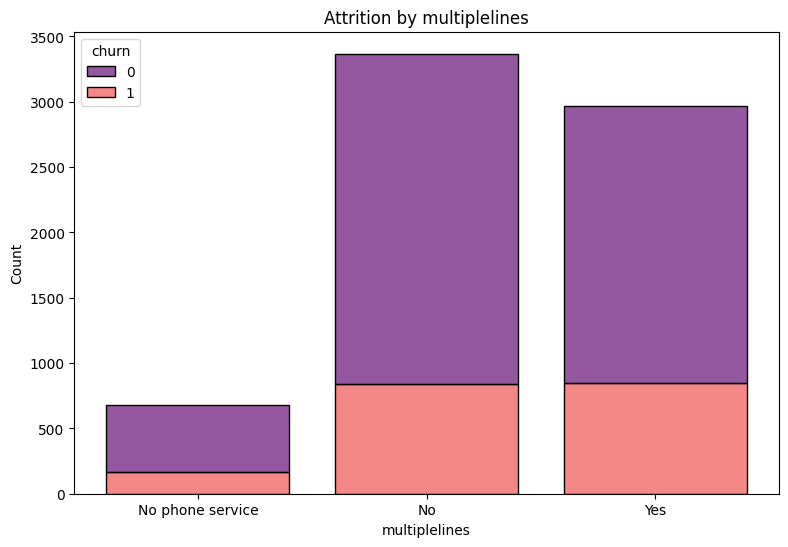

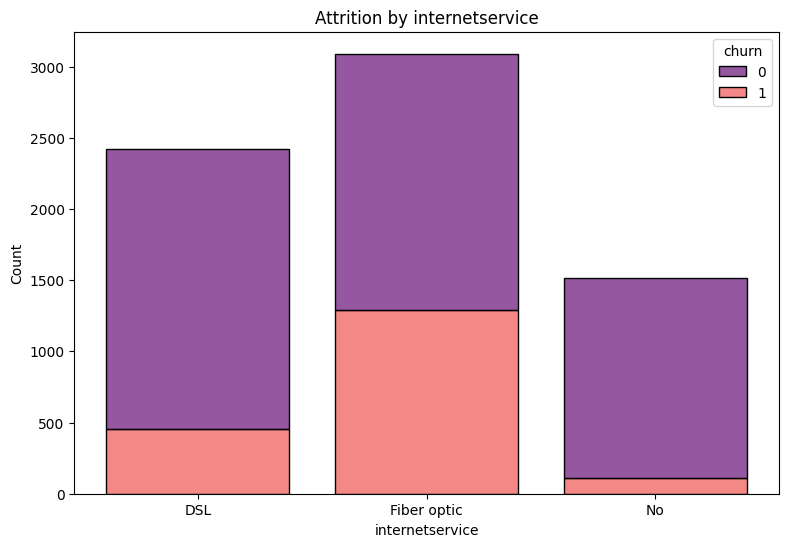

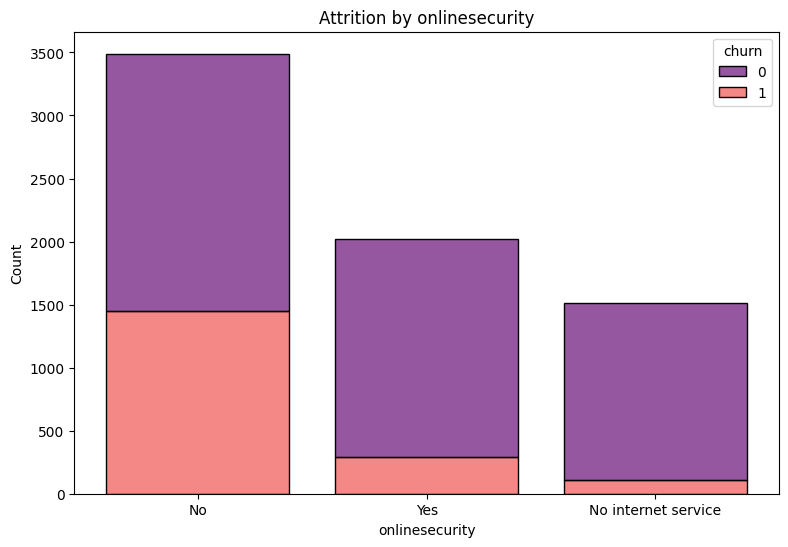

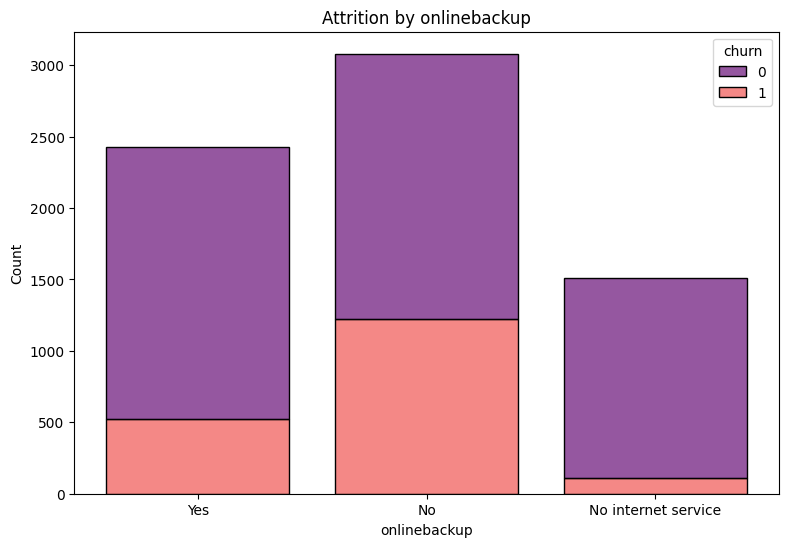

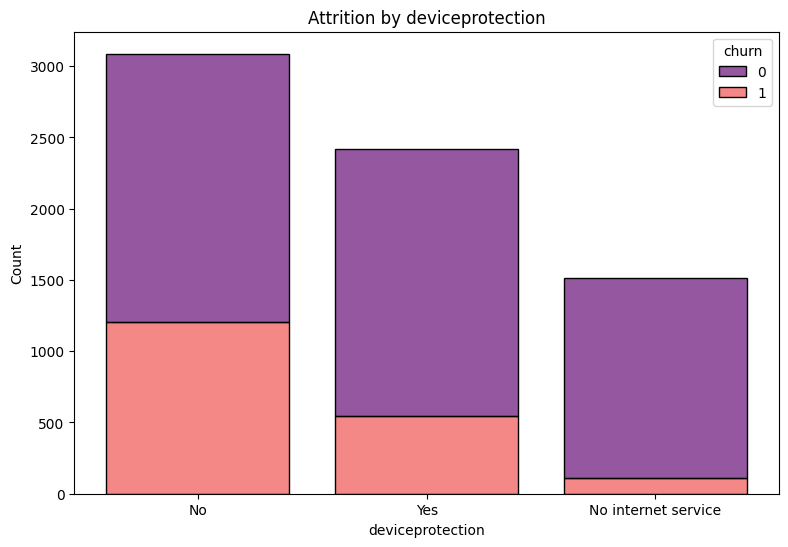

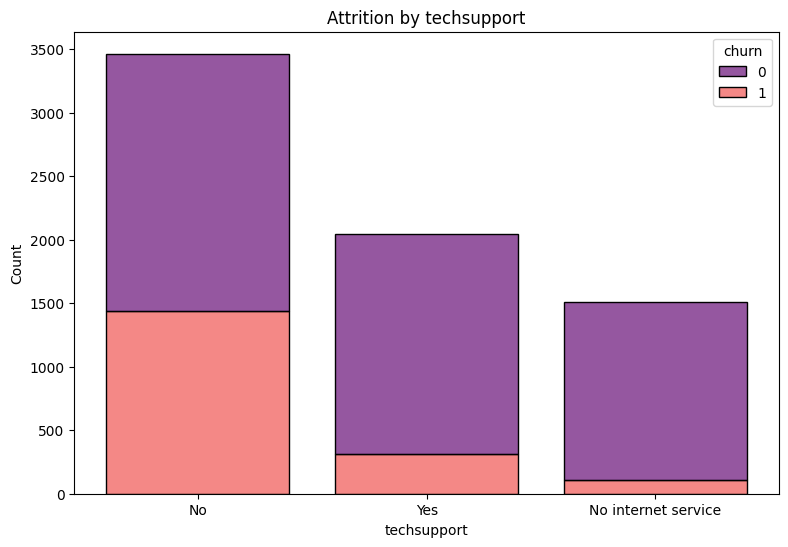

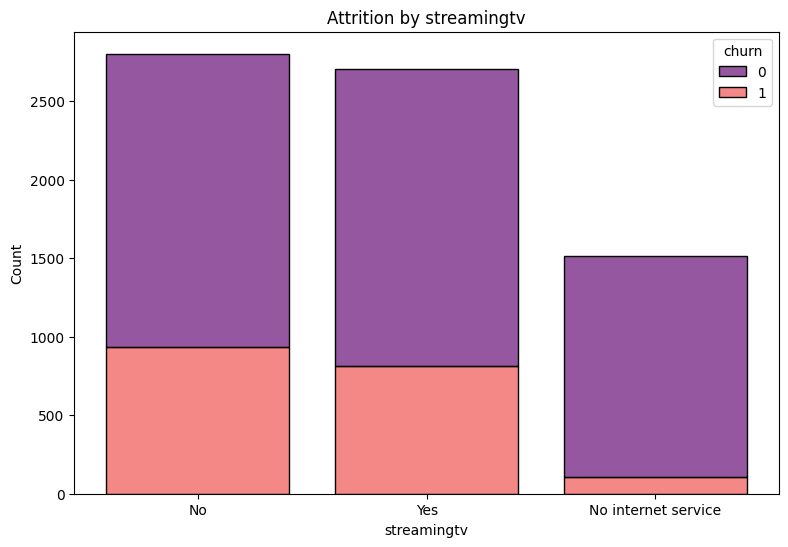

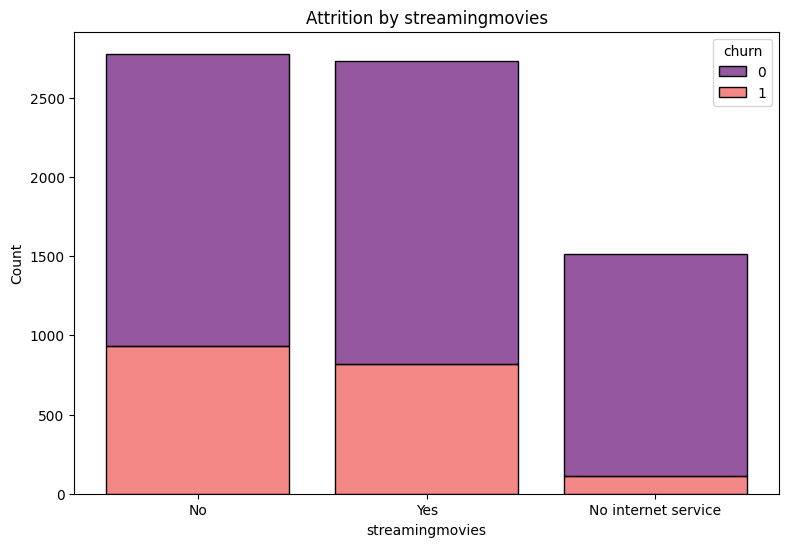

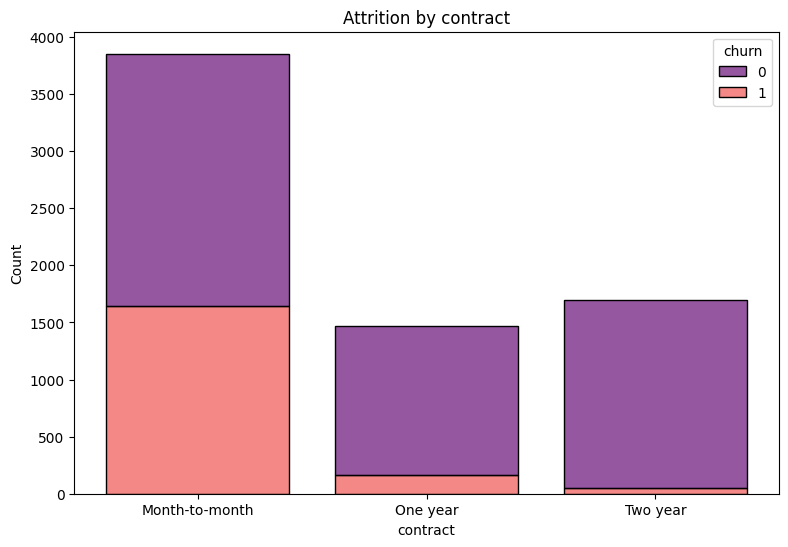

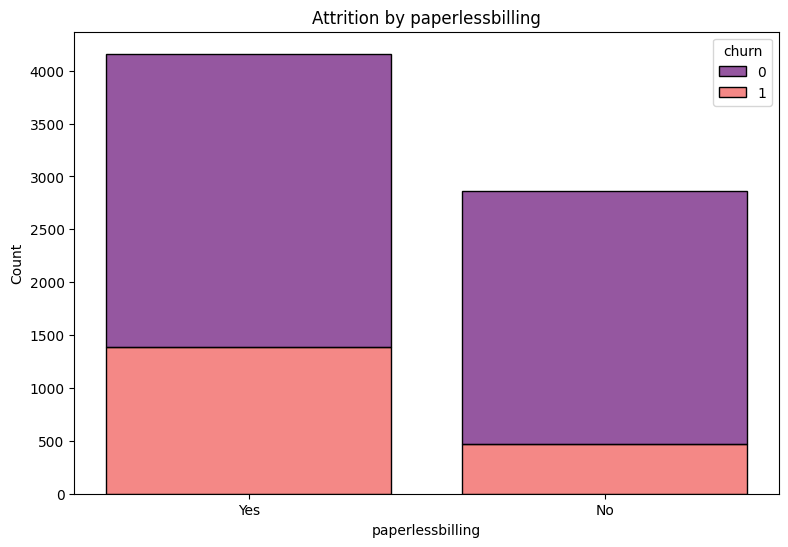

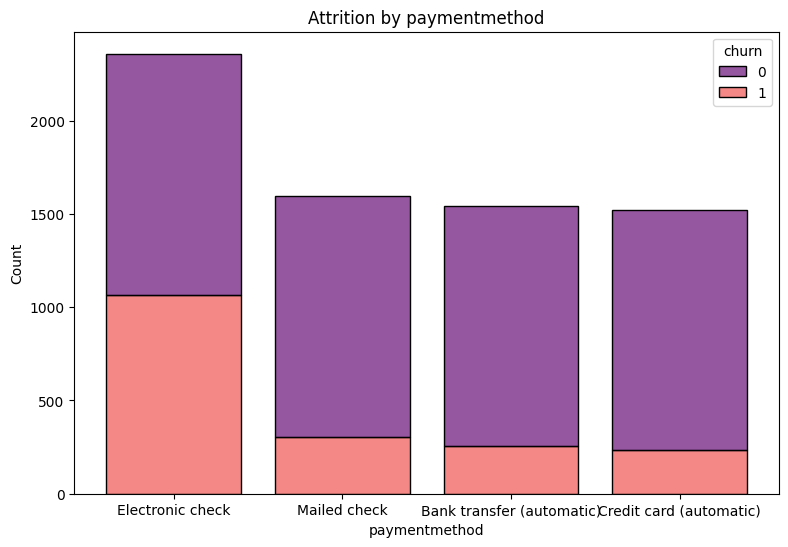

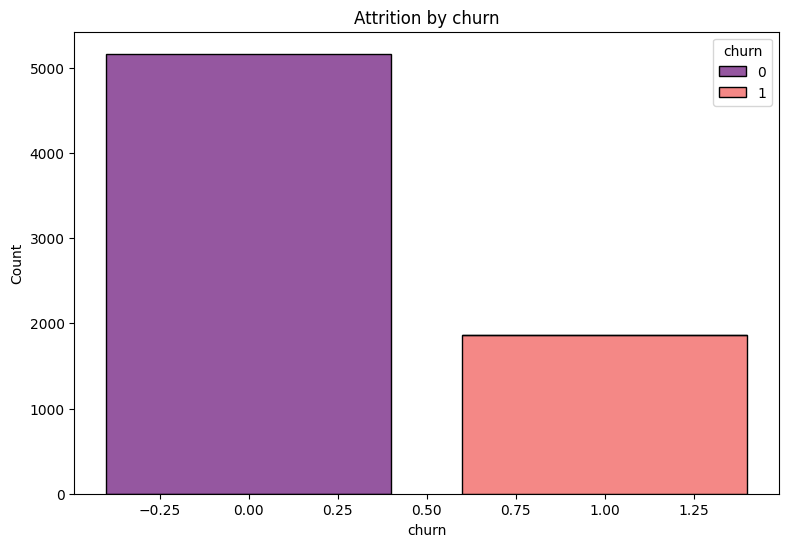

In [57]:
#bivariate churn vs other categorical values

for col in categorical:
    df[df['churn'] == 'Yes'][col].value_counts() 
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=col,bins=20,multiple='stack',hue = 'churn',palette='magma',discrete=True,shrink=.8)
    plt.title(f"Attrition by {col}")
    plt.show()


In [58]:
#churn vs numerical values
for col in numeric:
    fig = px.histogram(df,x = col ,color = 'churn',marginal = 'box')
    fig.show()

In [59]:
#binning
df['tenure_group'] = pd.cut(df.tenure, bins=3, labels=['low', 'medium', 'high'])
df['monthlycharges_group'] = pd.cut(df.monthlycharges, bins=3, labels=['low', 'medium', 'high'])
df['totalcharges_group'] = pd.cut(df.totalcharges, bins=3, labels=['low', 'medium', 'high'])

for col in ['tenure_group', 'monthlycharges_group', 'totalcharges_group']:
    df_group = df.groupby(col)['churn'].mean().round(2).reset_index()
    fig = px.bar(df_group, x=col, y='churn', color='churn', color_continuous_scale=['blue', 'red'], text='churn', width=800, height=400)
    fig.update_layout( title_text=f'{col}',showlegend=False)
    fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14980\3167970822.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\USER\AppData\Local\Temp\ipykernel_14980\3167970822.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\USER\AppData\Local\Temp\ipykernel_14980\3167970822.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [60]:
X = df.drop(['churn'], axis=1)
y = df['churn']

Model Development

In [61]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 


In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Scaling

In [63]:
categorical.pop()

'churn'

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

prep_pipe = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
]).set_output(transform='pandas')

X_train = prep_pipe.fit_transform(x_train)
X_test = prep_pipe.transform(x_test)


In [65]:

svm = SVC(kernel="poly")


In [66]:
model = svm.fit(X_train,y_train)
pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,pred))

accuracy 0.800711743772242
